# tiers - a hierarchical label handling library

The tiers library makes handling hierarchical labels easier. It is based on defining a hierarchy table with labels.

This notebook outlines the basics of using tiers.

Let's load up a hierarchy table. A hierarchy table consists of a table of strings that represent a hierarchy, and optionally a label column. The strings in the hierarchy table are referred to as *nodes* in tiers. A label is an arbitary string that maps to a node.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../tests/data/taxa_table.csv")
df

,kingdom,phylum,class,order,family,genus,species,type,label
0,Animalia,Arthropoda,Malacostraca,Isopoda,Asellidae,Asellus,NaN,NaN,As
1,Animalia,Arthropoda,Malacostraca,Isopoda,Asellidae,Asellus,Asellus aquaticus,NaN,Asellus_aquaticus
2,Animalia,Arthropoda,Malacostraca,Isopoda,Asellidae,Asellus,Asellus aquaticus,NaN,Asellus aquaticus
3,Animalia,Arthropoda,Insecta,Ephemeroptera,Caenidae,Caenis,Caenis horaria,NaN,Caenis_horaria
4,Animalia,Arthropoda,Insecta,Ephemeroptera,Caenidae,Caenis,Caenis luctuosa,NaN,Caenis_luctuosa
5,Animalia,Arthropoda,Insecta,Ephemeroptera,Caenidae,Caenis,Caenis rivulorum,NaN,Caenis_rivulorum
6,Animalia,Arthropoda,Insecta,Ephemeroptera,Baetidae,NaN,NaN,NaN,Baetidae
7,Animalia,Arthropoda,Insecta,Ephemeroptera,Baetidae,Cloeon,Cloeon dipterum,NaN,Cloeon_dipterum
8,Animalia,Arthropoda,Insecta,Trichoptera,Polycentropodidae,Cyrnus,Cyrnus trimaculatus,NaN,Cyrnus_trimaculatus
9,Animalia,Arthropoda,Insecta,Coleoptera,Elmidae,Oulimnius,Oulimnius tuberculatus,Oulimnius tuberculatus larva,Oulimnius_tuberculatus


Most of the species are classified to the species level, except *Asellus* and *Baetidae*. The species *Oulimnius tuberculatus* has two different subclasses, an adult and a larva form. The larva form has also two aliased mappings, Oulimnius_tuberculatus and Oulimnius_tuberculatus_larv are both mapped to the larva type. Similarly, "Asellus_aquaticus" and "Asellus aquaticus" (the same string as the node) are mapped to the same node.

The label assignment is arbitary and can be any string. For example, the species *Radix balthica* has the label RaBa in this dataset. The label can also be the same string as the leaf node (leftmost not-NaN value on the row).

tiers assumes that the last column of a hierarchy table is the label column. The mapping from labels to nodes can also be provided separately as a dict.

## Trees

The basic object in tiers is a `Tree`. The label hierarchy is saved to the tree and it handles the mapping of labels to different values in the hiearchy. A `Tree` remembers also the different names of each level, which are provided as column names in the original dataframe. `Tree` can be set to a specific level that all labels are mapped to.

In [2]:
import importlib
import tiers
importlib.reload(tiers)

tree = tiers.Tree.from_dataframe(df)
tree.show()

Animalia
├── Arthropoda
│   ├── Malacostraca
│   │   └── Isopoda
│   │       └── Asellidae
│   │           └── Asellus
│   │               └── Asellus aquaticus
│   └── Insecta
│       ├── Ephemeroptera
│       │   ├── Caenidae
│       │   │   └── Caenis
│       │   │       ├── Caenis horaria
│       │   │       ├── Caenis luctuosa
│       │   │       └── Caenis rivulorum
│       │   └── Baetidae
│       │       └── Cloeon
│       │           └── Cloeon dipterum
│       ├── Trichoptera
│       │   └── Polycentropodidae
│       │       ├── Cyrnus
│       │       │   └── Cyrnus trimaculatus
│       │       └── Polycentropus
│       │           └── Polycentropus flavomaculatus
│       └── Coleoptera
│           └── Elmidae
│               └── Oulimnius
│                   └── Oulimnius tuberculatus
│                       ├── Oulimnius tuberculatus larva
│                       └── Oulimnius tuberculatus adult
└── Mollusca
    └── Gastropoda
        └── Hygrophila
            └── Lymnaeid

In addition to the full tree, a simplified version can also be shown. Here leaves are showed on the level where they have siblings.

In [3]:
tree.show_simple()

Animalia
├── Arthropoda
│   ├── Malacostraca
│   └── Insecta
│       ├── Ephemeroptera
│       │   ├── Caenidae
│       │   │   └── Caenis
│       │   │       ├── Caenis horaria
│       │   │       ├── Caenis luctuosa
│       │   │       └── Caenis rivulorum
│       │   └── Baetidae
│       ├── Trichoptera
│       │   └── Polycentropodidae
│       │       ├── Cyrnus
│       │       └── Polycentropus
│       └── Coleoptera
│           └── Elmidae
│               └── Oulimnius
│                   └── Oulimnius tuberculatus
│                       ├── Oulimnius tuberculatus larva
│                       └── Oulimnius tuberculatus adult
└── Mollusca


A `Tree` has a `level` property, that shows the current level of the tree. This can be changed with `tree.set_level`. Possible levels can be seen in properties `levels` and `levels_sortable`, which includes the depth of the level. `leaf` is the special default level where labels are mapped to the deepest leaf found in the hierarchy.

In [4]:
tree.set_level("genus")
tree.level

'05_genus'

In [5]:
print(tree.levels)
print(tree.levels_sortable)

['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'type']
['00_kingdom', '01_phylum', '02_class', '03_order', '04_family', '05_genus', '06_species', '07_type']


## Mapping values

The basic functionality of a tree is to map values to different levels in the hierarchy. This can be done by passing a label of a list of labels to the `tree.map()` method. Because we set the tree level as genus, the label `RaBa` is mapped to the genus level.

In [6]:
tree.map("RaBa")

'Radix'

In [7]:
# A list can be also passed
tree.map(["Asellus_aquaticus",
          "Caenis_horaria"])

['Asellus', 'Caenis']

In [8]:
# The level can be changed temporarily. This does not affect the level of the tree
tree.map(["As",
          "Asellus_aquaticus",
          "Oulimnius_tuberculatus"],
          level="type")

['Asellus', 'Asellus aquaticus', 'Oulimnius tuberculatus larva']

In [9]:
# The tree level is not changed
print(tree.level)


05_genus


### Strict level mapping
Above we see that even though we specify the mapping on `type` level, the labels `Asellus` and `Asellus_aquaticus` are mapped to their lowest levels, `genus` and `species`. If we want to map strictly to the specified level, we can pass the parameter `strict=True` to the method. Then labels which correspond to a leaf node higher than the level are returned as `None`.

In [10]:
tree.map(["As",
          "Asellus_aquaticus",
          "Oulimnius_tuberculatus"],
          level="type",
          strict=True)

[None, None, 'Oulimnius tuberculatus larva']

In [11]:
tree.map("Oulimnius_tuberculatus", level="leaf")

'Oulimnius tuberculatus larva'

### Mapping node strings

The `tree.map` function accepts both label and node values. If a label has re-mapped a node value, a warning is given during the tree creation. Strings are always first assumed to be labels, and mapped to their corresponding node values. If a string is not in the label list, it is assumed to be a node.

If you want to handle strings purely as node values (for example if a label has re-mapped a node), pass `nodes=true` to the `map` method

The labels can be seen in the `tree.label_map` dict. 

In [12]:
tree.map(["Asellus", "Caenis"], level="phylum", nodes=True)

['Arthropoda', 'Arthropoda']

In [13]:
# when nodes is true, labels can't be passed for mapping
try:
    tree.map(["As", "Asellus_aquaticus"], nodes=True)
except Exception as e:
    print(e)

'Trying to get an nonexistent node As. Perhaps you are trying to find a label?'


In [14]:
# By default one can map for both labels and nodes
tree.map(["Caenis", "As"], level="phylum")

['Arthropoda', 'Arthropoda']

### Level mapping
We can map labels to the level strings

In [15]:
print(tree.get_level("As"))
print(tree.get_level(["Asellus aquaticus", "Caenis"], nodes=True, prefix=False))

05_genus
['species', 'genus']


# Mapping example: Pandas dataframe

A common use case for remapping values is in a pandas dataframe, when we want to regroup values.

We will use a demo dataset of taxon presences at different sites

In [16]:
df = pd.read_csv("../tests/data/presence.csv").set_index("taxon_code")
df

,ala,haa,hau,iso,kaj,kak,kir,koy,kuh,kuo,kur,lop,nie,pus,sii,val,vii
taxon_code,,,,,,,,,,,,,,,,,
AsAq,0,0,229,0,125,139,0,1531,99,0,0,0,0,190,263,0,0
CaHo,0,109,156,162,0,0,136,72,136,0,61,220,80,319,512,203,104
CaLu,0,0,0,0,0,351,0,0,0,0,0,107,0,0,0,0,0
Ce,0,0,0,155,0,0,0,0,0,0,0,0,0,0,0,0,0
Ch,145,208,0,686,0,142,0,260,144,161,179,270,153,140,242,560,134
EpVu,0,0,0,0,0,154,0,0,0,0,0,0,0,0,0,0,0
Gy,0,0,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0
HeDa,0,0,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HeSt,0,0,0,108,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's download a tree from a table.
To make things a bit more interesting, the `taxon_code` column does not match the same labeling as in the table. We will use a separate file to map codes to taxa, which is read from a file and used to update the tree.

In [17]:
def load_label_map(fname):
    with open(fname, "r") as f:
        content = f.readlines()
    c = [x.strip().split(",") for x in content]
    return {x[0]: x[1] for x in c}

In [18]:
df_full = pd.read_csv("../tests/data/full_taxa_table.csv")
tree = tiers.Tree.from_dataframe(df_full)
tree = tree.update_label_map(load_label_map("../tests/data/abb_map.txt"))
tree.show(labels=True) # setting labels=True shows the labels in the tree

Animalia
├── Nematomorpha [labels=['NEMATOMORPHA', 'NeMorph']]
├── Mollusca
│   ├── Gastropoda
│   │   ├── Gastropoda_order
│   │   │   ├── Lymnaeidae
│   │   │   │   ├── Radix
│   │   │   │   │   └── Radix balthica [labels=['Radix balthica/labiata', 'RaBa']]
│   │   │   │   ├── Lymnaea
│   │   │   │   │   └── Lymnaea stagnalis [labels=['LySt']]
│   │   │   │   ├── Stagnicola
│   │   │   │   │   └── Stagnicola palustris [labels=['StPa']]
│   │   │   │   └── Myxas
│   │   │   │       └── Myxas glutinosa [labels=['MyGl']]
│   │   │   ├── Planorbidae
│   │   │   │   ├── Gyraulus [labels=['Gy']]
│   │   │   │   │   └── Gyraulus albus [labels=['GyAl']]
│   │   │   │   └── Bathyomphalus
│   │   │   │       └── Bathyomphalus contortus [labels=['BaCo']]
│   │   │   ├── Acroloxidae
│   │   │   │   └── Acroloxus
│   │   │   │       └── Acroloxus lacustris [labels=['AcLa']]
│   │   │   └── Valvatidae
│   │   │       └── Valvata [labels=['Va']]
│   │   └── Littorinimorpha
│   │       └── Bithyniid

It's now easy to re-map the index to a desired level. Tiers makes also grouping and aggregation in pandas dataframes easy:

In [19]:
tree.map(df.index, level="order")

['Isopoda',
 'Ephemeroptera',
 'Ephemeroptera',
 'Diptera',
 'Diptera',
 'Ephemeroptera',
 'Gastropoda_order',
 'Ephemeroptera',
 'Rhynchobdellida',
 'Ephemeroptera',
 'Ephemeroptera',
 'Trichoptera',
 'Hemiptera',
 'Trichoptera',
 'Campanulales',
 'Coleoptera',
 'Coleoptera',
 'Coleoptera',
 'Trichoptera',
 'Tubificida',
 'Tubificida',
 'Diptera',
 'Trichoptera']

In [20]:
level="order"
grouped = df.assign(taxon=tree.map(df.index, level=level)).groupby("taxon").sum()
grouped

,ala,haa,hau,iso,kaj,kak,kir,koy,kuh,kuo,kur,lop,nie,pus,sii,val,vii
taxon,,,,,,,,,,,,,,,,,
Campanulales,0,0,0,411,0,68,54,122,106,0,111,0,0,175,237,0,0
Coleoptera,0,0,320,811,0,0,0,200,0,0,108,0,98,0,0,0,0
Diptera,145,208,0,948,0,142,0,260,144,161,179,270,153,140,242,560,134
Ephemeroptera,207,109,331,5374,96,505,136,72,248,378,173,402,80,377,1211,203,177
Gastropoda_order,0,0,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0
Hemiptera,0,0,0,293,0,0,0,0,0,0,0,0,0,0,363,0,0
Isopoda,0,0,229,0,125,139,0,1531,99,0,0,0,0,190,263,0,0
Rhynchobdellida,0,0,0,108,0,0,0,0,0,0,0,0,0,0,0,0,0
Trichoptera,0,0,0,65,0,190,0,139,0,121,63,0,0,156,0,0,0


Tiers makes it easy to *extend* hierarchical labels, or to turn a label into a list showing the full hierarchy:

In [21]:
tree.extend_label("Oligochaeta")

['Animalia',
 'Angiospermae',
 'Dicotyledoneae',
 'Campanulales',
 'Asteraceae',
 'Oligochaeta',
 '',
 '',
 'Oligochaeta']

In [22]:
# Extension of a list of labels
tree.extend_labels(["OuTu", "Asellus aquaticus"])

[array(['Animalia', 'Arthropoda', 'Insecta', 'Coleoptera', 'Elmidae',
        'Oulimnius', 'Oulimnius tuberculatus', '', 'OuTu'], dtype='<U22'),
 array(['Animalia', 'Arthropoda', 'Malacostraca', 'Isopoda', 'Asellidae',
        'Asellus', 'Asellus aquaticus', '', 'Asellus aquaticus'],
       dtype='<U22')]

In [23]:
# Automatic joining of extensions into a single string. Padding returns uniformly sized strings
tree.extend_labels(["OuTuAd", "Asellus aquaticus"], return_string=True, pad=True)

['Animalia - Arthropoda -      Insecta - Coleoptera -   Elmidae - Oulimnius - Oulimnius tuberculatus - Oulimnius tuberculatus adult -            OuTuAd',
 'Animalia - Arthropoda - Malacostraca -    Isopoda - Asellidae -   Asellus -      Asellus aquaticus -                              - Asellus aquaticus']

Extension can also return a Pandas MultiIndex for easy manipulation of dataframe indices:

In [24]:
df_multiindex = grouped.copy()
df_multiindex.index = tree.extend_to_multiindex(grouped.index)
df_multiindex

ala  \
kingdom  phylum       class          order            family genus species type label                   
Animalia Angiospermae Dicotyledoneae Campanulales                               Campanulales        0   
         Arthropoda   Insecta        Coleoptera                                 Coleoptera          0   
                                     Diptera                                    Diptera           145   
                                     Ephemeroptera                              Ephemeroptera     207   
         Mollusca     Gastropoda     Gastropoda_order                           Gastropoda_order    0   
         Arthropoda   Insecta        Hemiptera                                  Hemiptera           0   
                      Malacostraca   Isopoda                                    Isopoda             0   
         Annelida     Clitellata     Rhynchobdellida                            Rhynchobdellida     0   
         Arthropoda   Insecta        Trichoptera                                Trichoptera         0   
         Annelida     Clitellata     Tubificida                                 Tubificida          0   

                                                                                                  haa  \
kingdom  phylum       class          order            family genus species type label                   
Animalia Angiospermae Dicotyledoneae Campanulales                               Campanulales        0   
         Arthropoda   Insecta        Coleoptera                                 Coleoptera          0   
                                     Diptera                                    Diptera           208   
                                     Ephemeroptera                              Ephemeroptera     109   
         Mollusca     Gastropoda     Gastropoda_order                           Gastropoda_order    0   
         Arthropoda   Insecta        Hemiptera                                  Hemiptera           0   
                      Malacostraca   Isopoda                                    Isopoda             0   
         Annelida     Clitellata     Rhynchobdellida                            Rhynchobdellida     0   
         Arthropoda   Insecta        Trichoptera                                Trichoptera         0   
         Annelida     Clitellata     Tubificida                                 Tubificida          0   

                                                                                                  hau  \
kingdom  phylum       class          order            family genus species type label                   
Animalia Angiospermae Dicotyledoneae Campanulales                               Campanulales        0   
         Arthropoda   Insecta        Coleoptera                                 Coleoptera        320   
                                     Diptera                                    Diptera             0   
                                     Ephemeroptera                              Ephemeroptera     331   
         Mollusca     Gastropoda     Gastropoda_order                           Gastropoda_order    0   
         Arthropoda   Insecta        Hemiptera                                  Hemiptera           0   
                      Malacostraca   Isopoda                                    Isopoda           229   
         Annelida     Clitellata     Rhynchobdellida                            Rhynchobdellida     0   
         Arthropoda   Insecta        Trichoptera                                Trichoptera         0   
         Annelida     Clitellata     Tubificida                                 Tubificida         60   

                                                                                                   iso  \
kingdom  phylum       class          order            family genus species type label                    
Animalia Angiospermae Dicotyledoneae Campanulales                               Campanulales       411 

A subset of extended levels can be chosen:

In [25]:
tree.extend_labels(["OuTuAd", "Asellus aquaticus"],
                   return_string=True, 
                   pad=True,
                   levels=["phylum", "order"])

['Arthropoda - Coleoptera -            OuTuAd',
 'Arthropoda -    Isopoda - Asellus aquaticus']

In [26]:
df_multiindex_subset = df.copy()
df_multiindex_subset.index = tree.extend_to_multiindex(df.index, levels=["order", "genus"])
df_multiindex_subset

ala  haa  hau   iso  kaj  kak  kir  \
order            genus        label                                          
Isopoda          Asellus      AsAq        0    0  229     0  125  139    0   
Ephemeroptera    Caenis       CaHo        0  109  156   162    0    0  136   
                              CaLu        0    0    0     0    0  351    0   
Diptera                       Ce          0    0    0   155    0    0    0   
                              Ch        145  208    0   686    0  142    0   
Ephemeroptera    Ephemera     EpVu        0    0    0     0    0  154    0   
Gastropoda_order Gyraulus     Gy          0    0    0    76    0    0    0   
Ephemeroptera    Heptagenia   HeDa        0    0  117     0    0    0    0   
Rhynchobdellida  Helobdella   HeSt        0    0    0   108    0    0    0   
Ephemeroptera    Kageronia    KaFu      207    0   58   517    0    0    0   
                 Leptophlebia Le          0    0    0  4695   96    0    0   
Trichoptera      Limnephilus  LiPhilus    0    0    0    65    0    0    0   
Hemiptera        Micronecta   Mi          0    0    0   293    0    0    0   
Trichoptera      Mystacides   MyAz        0    0    0     0    0   85    0   
Campanulales     Oligochaeta  Ol          0    0    0   411    0   68   54   
Coleoptera       Oulimnius    OuTu        0    0    0   487    0    0    0   
                              OuTuAd      0    0    0     0    0    0    0   
                              OuTuLa      0    0  320   324    0    0    0   
Trichoptera      Psychomyia   PsPu        0    0    0     0    0    0    0   
Tubificida       Spirosperma  SpFe        0    0   60     0    0    0    0   
                 Stylaria     StLa        0    0    0     0    0    0    0   
Diptera          Tanypodinae  Tan         0    0    0   107    0    0    0   
Trichoptera      Tinodes      TiWa        0    0    0     0    0  105    0   

                                         koy  kuh  kuo  kur  lop  nie  pus  \
order            genus        label                                          
Isopoda          Asellus      AsAq      1531   99    0    0    0    0  190   
Ephemeroptera    Caenis       CaHo        72  136    0   61  220   80  319   
                              CaLu         0    0    0    0  107    0    0   
Diptera                       Ce           0    0    0    0    0    0    0   
                              Ch         260  144  161  179  270  153  140   
Ephemeroptera    Ephemera     EpVu         0    0    0    0    0    0    0   
Gastropoda_order Gyraulus     Gy           0    0    0    0    0    0    0   
Ephemeroptera    Heptagenia   HeDa         0    0    0    0    0    0    0   
Rhynchobdellida  Helobdella   HeSt         0    0    0    0    0    0    0   
Ephemeroptera    Kageronia    KaFu         0  112    0  112    0    0   58   
                 Leptophlebia Le           0    0  378    0   75    0    0   
Trichoptera      Limnephilus  LiPhilus     0    0    0    0    0    0    0   
Hemiptera        Micronecta   Mi           0    0    0    0    0    0    0   
Trichoptera      Mystacides   MyAz         0    0    0    0    0    0    0   
Campanulales     Oligochaeta  Ol         122  106    0  111    0    0  175   
Coleoptera       Oulimnius    OuTu         0    0    0  108    0   98    0   
                              OuTuAd      70    0    0    0    0    0    0   
                              OuTuLa     130    0    0    0    0    0    0   
Trichoptera      Psychomyia   PsPu         0    0    0   63    0    0    0   
Tubificida       Spirosperma  SpFe         0   86    0    0    0    0    0   
                 Stylaria     StLa         0  215    0    0    0    0    0   
Diptera          Tanypodinae  Tan          0    0    0    0    0    0    0   
Trichoptera      Tinodes      TiWa       139    0  121    0    0    0  156   

                                        sii  val  vii  
order            genus        label                    
Isopoda          Asellus  

Extension of labels to strings makes plotting easier

In [27]:
tree.extend_to_multiindex(["AsAq", "AsAq"])

MultiIndex([('Animalia', 'Arthropoda', 'Malacostraca', 'Isopoda', ...),
            ('Animalia', 'Arthropoda', 'Malacostraca', 'Isopoda', ...)],
           names=['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'type', 'label'])

Extended labels can be easily used in plotting. Note that you have to set the font as monospace to make the labels look nice.

Sorting the index is also easy with tiers, using `sort_labels` method. This can be used to sort the index in a pandas dataframe.

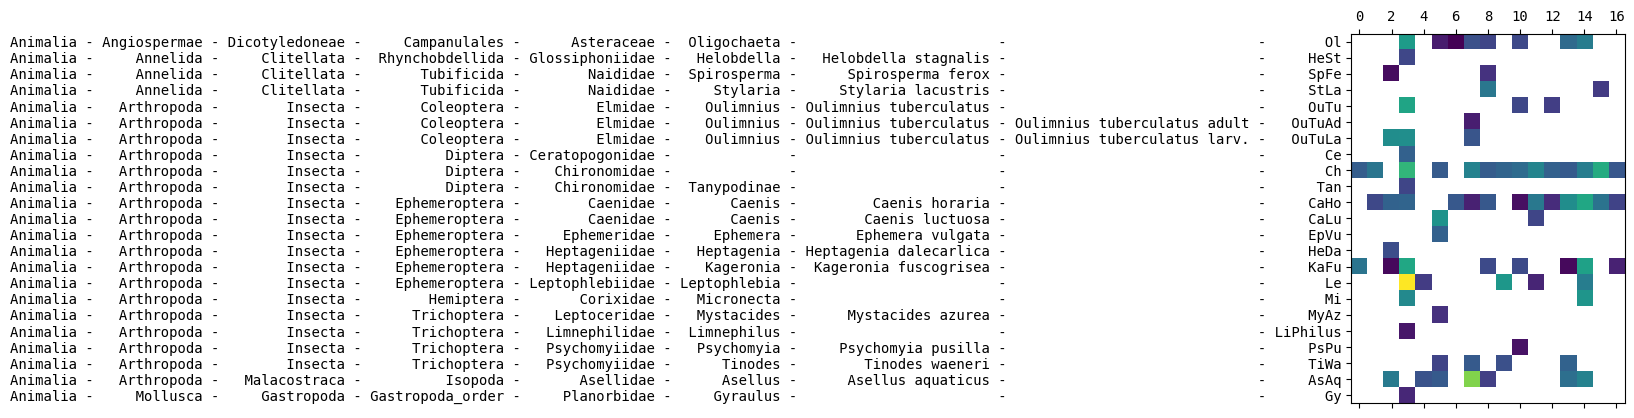

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "monospace" # Make labels align properly
df = np.log(df.map(lambda x: np.nan if x == 0 else x)) # log transform to make the plot more readable

df = df.loc[tree.sort_labels(df.index)] # Sort the labels based on the hierarchical order
fig, ax = plt.subplots()
ax.matshow(np.log(df)) 
ax.set_yticks(range(len(df.index)),
              labels=tree.extend_labels(df.index, return_string=True, pad=True))
plt.show()

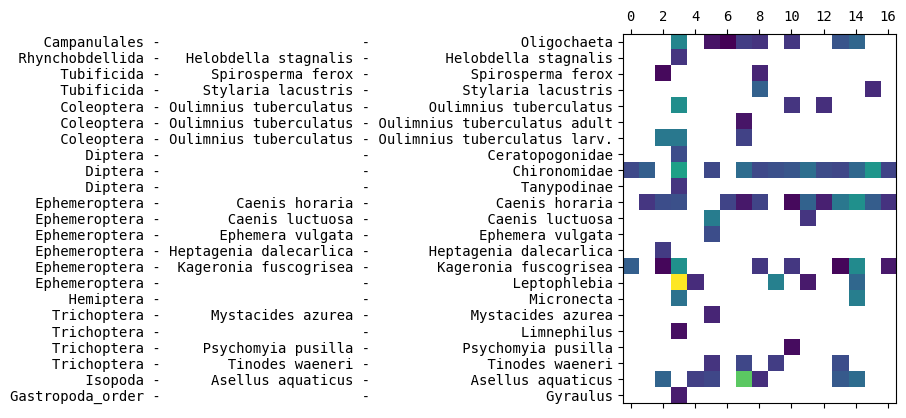

In [29]:
# A more complex example with selection of levels and first mapping to leaf level
fig, ax = plt.subplots()
df_sorted = df.loc[tree.sort_labels(df.index)]
ax.matshow(df)
ax.set_yticks(range(len(df.index)),
              labels=tree.extend_labels(tree.map(df.index, level="leaf"), # Mapping first to leaf level
                                        return_string=True,
                                        pad=True,
                                        levels=["order", "species"]))
plt.show()

# Other features

Tiers provides also useful functions for handling hierarchical labels.

### A tree from a dataframe without labels

A tiers `Tree` can be created also without label mappings.

In [30]:
df_nolbl = pd.read_csv("../tests/data/taxa_table_no_labels.csv")
tree_nolbl = tiers.Tree(df = df_nolbl)
tree_nolbl.show_simple()

Animalia
├── Arthropoda
│   ├── Malacostraca
│   └── Insecta
│       ├── Ephemeroptera
│       │   ├── Caenidae
│       │   │   └── Caenis
│       │   │       ├── Caenis horaria
│       │   │       ├── Caenis luctuosa
│       │   │       └── Caenis rivulorum
│       │   ├── Baetidae
│       │   │   ├── Centroptilum
│       │   │   └── Cloeon
│       │   ├── Ephemeridae
│       │   └── Heptageniidae
│       │       ├── Heptagenia
│       │       └── Kageronia
│       ├── Trichoptera
│       │   ├── Polycentropodidae
│       │   │   ├── Cyrnus
│       │   │   └── Polycentropus
│       │   ├── Ecnomidae
│       │   ├── Lepidostomatidae
│       │   ├── Leptoceridae
│       │   └── Psychomyiidae
│       │       ├── Psychomyia
│       │       └── Tinodes
│       └── Coleoptera
│           └── Elmidae
│               └── Oulimnius
│                   └── Oulimnius tuberculatus
│                       ├── Oulimnius tuberculatus larva
│                       └── Oulimnius tuberculatus adult
├──

In [31]:
tree_nolbl.map(["Cloeon",
                "Cyrnus"],
                level="family")

['Baetidae', 'Polycentropodidae']

A label mapping can be later assigned

In [32]:
label_map = {"CaHo": "Caenis horaria"}
tree_nolbl.label_map = label_map
tree_nolbl.map(["CaHo", "Stylaria"], level="family")

['Caenidae', 'Naididae']

A label map can be safely updated with `tree.update_label_map`

In [33]:
tree_nolbl = tree_nolbl.update_label_map({"test_label": "Caenis horaria"})
tree_nolbl.map(["test_label", "CaHo"])

['Caenis horaria', 'Caenis horaria']

## Label as the same name as node
If your labels contain strings that are present in the hierarchy table, these values can be mapped to a different node. During tree creation this must be specified or a warning will be given. Here we want to remap label `Asellidae` to `Asellus`

In [34]:
df_remap_node = pd.read_csv("../tests/data/ancestor_as_label.csv")
df_remap_node

,kingdom,phylum,class,order,family,genus,species,type,label
0,Animalia,Arthropoda,Malacostraca,Isopoda,Asellidae,Asellus,NaN,NaN,Asellidae
1,Animalia,Arthropoda,Malacostraca,Isopoda,Asellidae,Asellus,Asellus aquaticus,NaN,Asellus_aquaticus
2,Animalia,Arthropoda,Insecta,Ephemeroptera,Caenidae,Caenis,Caenis horaria,NaN,Caenis_horaria
3,Animalia,Arthropoda,Insecta,Ephemeroptera,Caenidae,Caenis,Caenis luctuosa,NaN,Caenis_luctuosa
4,Animalia,Arthropoda,Insecta,Ephemeroptera,Caenidae,Caenis,Caenis rivulorum,NaN,Caenis_rivulorum


In [35]:
tree_remap = tiers.Tree.from_dataframe(df_remap_node)

D:\koodia\tiers\src\tiers\__init__.py:446: UserWarning: label 'Asellidae' is in the hierarchy as a higher-level node. It will map to 'Asellus' by default, unless nodes=True is set. Remove the redundant row from the dataframe or set `node_remapping=True` if you want to use node names as labels and suppress this warning
  warnings.warn(


In [36]:
# The warning can be suppressed by setting node_remapping=True
tree_remap = tiers.Tree.from_dataframe(df_remap_node, node_remapping=True)
tree_remap.show()

Animalia
└── Arthropoda
    ├── Malacostraca
    │   └── Isopoda
    │       └── Asellidae
    │           └── Asellus
    │               └── Asellus aquaticus
    └── Insecta
        └── Ephemeroptera
            └── Caenidae
                └── Caenis
                    ├── Caenis horaria
                    ├── Caenis luctuosa
                    └── Caenis rivulorum


In [37]:
# if nodes=False, 'Asellidae' is handled as a label
tree_remap.map(["Asellidae", "Asellus_aquaticus"], nodes=False)

['Asellus', 'Asellus aquaticus']

In [38]:
# if nodes=True, it is handled as a node string
tree_remap.map(["Asellidae", "Asellus aquaticus"], nodes=True)

['Asellidae', 'Asellus aquaticus']

### Other functions
- `in_ancestors`: See if a node value is in ancestors
- `match`: checks if the two nodes are of the same lineage
- `lca`: find the lowest common ancestor of two nodes
- `match_level` returns the level where the two nodes have the lowest common ancestor

All functions have the parameter `nodes=False` which assumes the strings are node names instead of labels

In [39]:
print(tree.in_ancestors("Caenis horaria", "Caenis"))
print(tree.in_ancestors("Caenis horaria", "Caenis horaria"))
print(tree.match("Caenis horaria", "Caenis"))
print(tree.match("Caenis", "Caenis horaria"))
print(tree.match("Baetidae", "Caenis horaria"))
print(tree.match("Caenis horaria", "Baetidae"))
print(tree.match("Caenis horaria", "Caenis horaria"))
print(tree.lca("Caenis horaria", "Baetidae"))
print(tree.lca("Caenis horaria", "Asellus aquaticus"))
print(tree.match_level("Caenis horaria", "Baetidae"))

True
False
True
True
False
False
True
Ephemeroptera
Arthropoda
03_order


### Merging trees

Trees can be merged. The label mappings come now from both trees

In [40]:
tree = tiers.Tree.from_dataframe(pd.read_csv("../tests/data/taxa_table.csv"))
new_tree = tree.merge(tree_nolbl)
new_tree.show(labels=True)

Animalia
├── Arthropoda
│   ├── Malacostraca
│   │   └── Isopoda
│   │       └── Asellidae
│   │           └── Asellus [labels=['As']]
│   │               └── Asellus aquaticus [labels=['Asellus_aquaticus']]
│   └── Insecta
│       ├── Ephemeroptera
│       │   ├── Caenidae
│       │   │   └── Caenis
│       │   │       ├── Caenis horaria [labels=['Caenis_horaria', 'CaHo', 'test_label']]
│       │   │       ├── Caenis luctuosa [labels=['Caenis_luctuosa']]
│       │   │       └── Caenis rivulorum [labels=['Caenis_rivulorum']]
│       │   ├── Baetidae
│       │   │   ├── Cloeon
│       │   │   │   └── Cloeon dipterum [labels=['Cloeon_dipterum']]
│       │   │   └── Centroptilum
│       │   │       └── Centroptilum luteolum
│       │   ├── Ephemeridae
│       │   │   └── Ephemera
│       │   │       └── Ephemera vulgata
│       │   └── Heptageniidae
│       │       ├── Heptagenia
│       │       │   └── Heptagenia dalecarlica
│       │       └── Kageronia
│       │           └── Kageronia

In [41]:
new_tree.label_map

{'As': 'Asellus',
 'Asellus_aquaticus': 'Asellus aquaticus',
 'Asellus aquaticus': 'Asellus aquaticus',
 'Caenis_horaria': 'Caenis horaria',
 'Caenis_luctuosa': 'Caenis luctuosa',
 'Caenis_rivulorum': 'Caenis rivulorum',
 'Baetidae': 'Baetidae',
 'Cloeon_dipterum': 'Cloeon dipterum',
 'Cyrnus_trimaculatus': 'Cyrnus trimaculatus',
 'Oulimnius_tuberculatus': 'Oulimnius tuberculatus larva',
 'Oulimnius_tuberculatus_adult': 'Oulimnius tuberculatus adult',
 'Oulimnius_tuberculatus_larv': 'Oulimnius tuberculatus larva',
 'Polycentropus_flavomaculatus': 'Polycentropus flavomaculatus',
 'RaBa': 'Radix balthica',
 'CaHo': 'Caenis horaria',
 'test_label': 'Caenis horaria'}

In [42]:
# New label, old label and node name are mapped to the same node
new_tree.map(["CaHo", "Caenis_horaria", "Caenis horaria"], level="species")

['Caenis horaria', 'Caenis horaria', 'Caenis horaria']